In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv")

In [3]:
# Data preprocessing
# Dropping unnecessary columns and handling categorical variables
data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)

In [4]:
# Splitting the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [5]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Creating the model
model = LinearRegression()

In [7]:
# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Evaluating model performance using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

In [9]:
# Printing cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [ 0.62378736  0.63163559  0.31315605  0.36430923 -0.49442466]
Mean cross-validation score: 0.28769271591783796


In [10]:
# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -29773.171493008944
Coefficients: [ 9.72800990e+01  1.08169496e+02 -8.21707142e+01  5.71524325e+02
  1.11260589e+02  3.77338016e+00  1.23899791e+02 -2.10742817e+03
 -3.87492846e+03 -2.73509262e+02  1.76038614e+00  1.97395045e+00
 -2.36154810e+02  1.94134939e+02 -2.54812275e+03  1.84243982e+03
 -3.08277949e+02 -3.79461257e+03 -2.55863553e+03 -1.62120718e+03
 -3.22852281e+03 -2.34660582e+02  8.51335193e+02  1.08215940e+04
 -5.78036634e+03 -2.08833665e+03  2.19796085e+03  6.01564055e+02
 -4.25447726e+03  2.82854565e+01 -7.51357577e+03 -8.47512520e+03
 -7.42734443e+03  1.36424205e-12 -1.20843838e+04  2.82854565e+01
  1.50895655e+02 -6.89336450e+02  2.54812275e+03 -2.70819592e+03
  2.32285535e+02 -2.25594029e+03 -5.06408453e+02]


In [11]:
# Make predictions
predictions = model.predict(X_test)

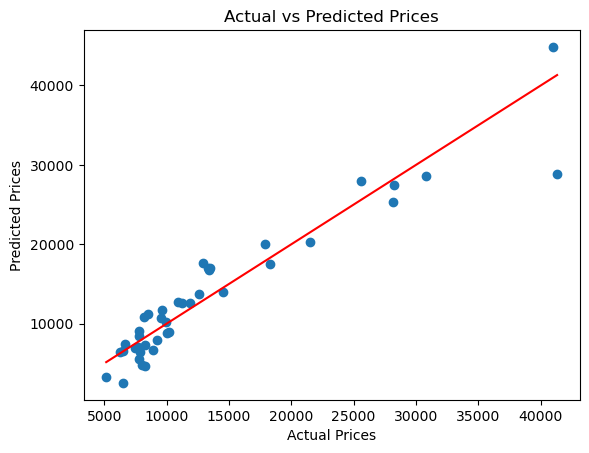

In [12]:
# Visualizing actual vs predicted prices
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.show()